In [46]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris=datasets.load_iris()
features=iris.data
target=iris.target

%matplotlib inline

# 決定木で分類したい

In [11]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier(random_state=0)

# デフォルトではジニ係数で最適化される
model=dec_tree.fit(features,target)

# エントロピーが良い場合、以下のように指定
dec_tree_en=DecisionTreeClassifier(random_state=0,criterion='entropy')
model_en=dec_tree.fit(features,target)

# 決定木を可視化したい


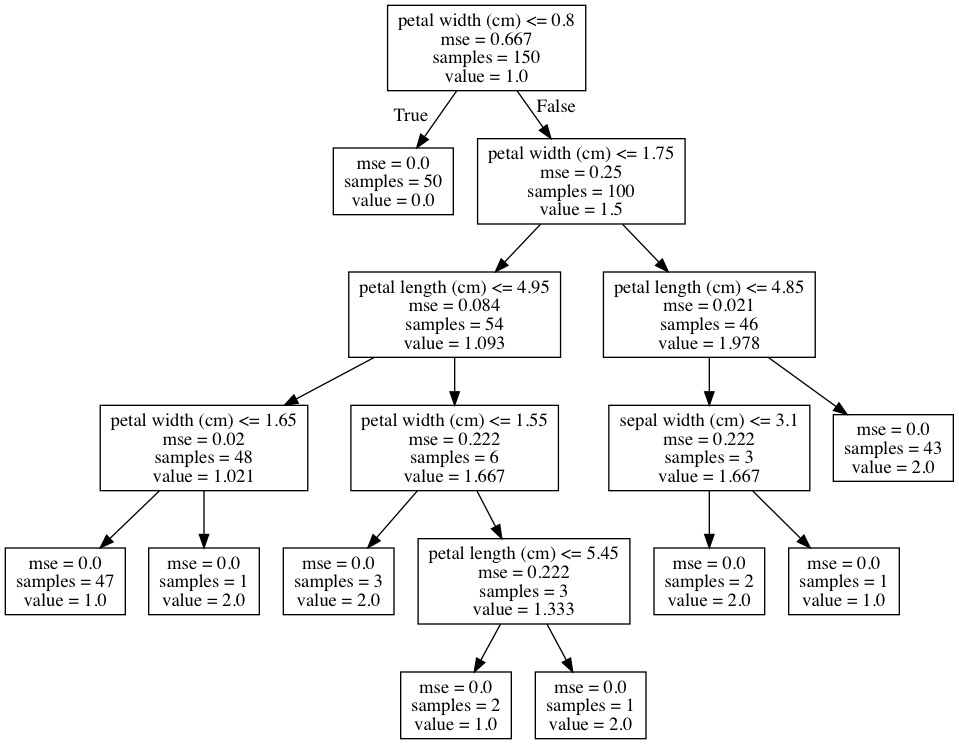

In [25]:
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from IPython.display import  Image
from sklearn import  tree

# 判定にMSEを使用する
dec_tree=DecisionTreeRegressor(random_state=0)

model=dec_tree.fit(features,target)

# 決定木の木と葉を可視化
dot_data=tree.export_graphviz(
    decision_tree=dec_tree,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names
                             )

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_jpg())

# ランダムフォレストのなかで　一番効いてる特徴量の可視化 

([<matplotlib.axis.XTick at 0x11617d5c0>,
 <a list of 4 Text xticklabel objects>)

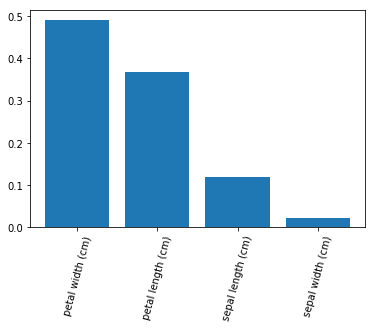

In [83]:
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestClassifier

random_forest=RandomForestClassifier(random_state=0,n_jobs=2)

model=random_forest.fit(features,target)

# 特徴量の中で、重要なものをリストアップ
importance=model.feature_importances_

# それぞれの順序のindexを取得
indices=np.argsort(importance)[::-1]

# indexから特徴量名を取得
names=[iris.feature_names[i] for i in indices]

plt.figure()
# 頻度分布の出力
plt.bar(range(features.shape[1]),importance[indices])

# 特徴量名の追加
plt.xticks(range(features.shape[1]),names,rotation=75)